In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df.rename(columns={'v1':'type','v2':'text'},inplace=True)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [39]:
df.shape

(5572, 2)

In [40]:
#df['spam']=df['type'].apply(lambda x:1 if x=='spam' else 0)
#df.head()

In [41]:
from sklearn.preprocessing import   LabelEncoder
encoder=LabelEncoder()
df['type']=encoder.fit_transform(df['type'])
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [43]:
df.duplicated().sum()

403

In [44]:
df.shape

(5572, 2)

In [45]:
# droping duplicate values
df.drop_duplicates(keep='first',inplace=True)
df.shape

(5169, 2)

<Axes: >

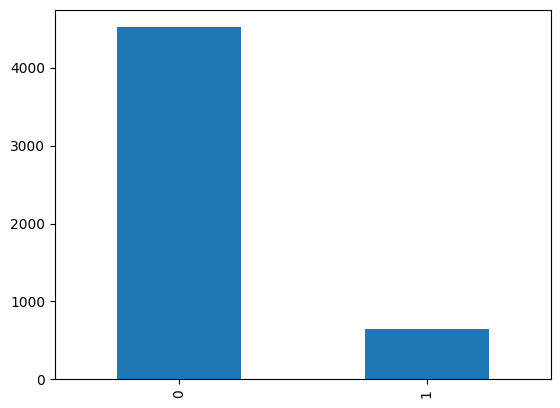

In [46]:
df['type'].value_counts().plot(kind='bar')

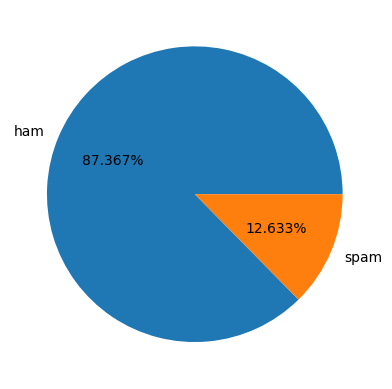

In [47]:
import matplotlib.pyplot as plt

plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct='%1.3f%%')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['text'],df['type'],test_size=0.2,random_state=1)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

model.fit(x_train_count,y_train)

MultinomialNB()

In [51]:
model.score(x_train_count,y_train)

0.992503022974607

In [52]:
test=model.predict(v.transform(x_test))


In [55]:
test

array([0, 0, 0, ..., 0, 0, 1])